**Computation cost** 

**Introduction**

- Many real-world problems involve solving large systems of equations.
- Large-scale matrices (millions of entries) require significant computational resources.
- Applications: fluid and solid mechanics, weather prediction, image processing, quantum mechanics, etc.
- Different methods (Gaussian elimination, LU decomposition, etc.) have varying efficiencies.
- Computational efficiency is crucial for handling large matrices.



**.Matrix-Vector Multiplication**

- Given an $n \times n$ matrix $A$ and an $n \times 1$ vector $b$.
- Each entry of $Ab$ is computed as:
\begin{equation*}
            (Ab)_i = \sum_{j=1}^{n} a_{ij} b_j,
        \end{equation*}
which requires $n$ multiplications and $n-1$ additions per entry.
- Since there are $n$ entries in the resulting vector, the total operations are:

- Multiplications: $n^2$
- Additions: $n^2 - n$

- Example: For $n = 10^6$, we perform $10^{12}$ multiplications, making computation very expensive.

**.Gaussian Elimination**

- Gaussian elimination transforms a system $Ax = b$ into an upper triangular system $Ux = c$.
- The main steps involve:

- Forward elimination: Eliminating lower triangular entries by row operations.
- Back substitution: Solving for unknowns from the last row upward.

- The operation count for forward elimination is computed as:
 \begin{equation*}
            \sum_{j=1}^{n} (n-j)(n-j+1) \approx \frac{n^3}{3} \text{ multiplications}.
        \end{equation*}
- Similarly, additions count as:
 \begin{equation*}
            \sum_{j=1}^{n} (n-j)^2 \approx \frac{2n^3 - 3n^2 + n}{6}.
        \end{equation*}
- When $n$ is large, these costs dominate, making Gaussian elimination computationally expensive.

**.Inverse Matrix Approach**

- Computing $A^{-1}$ is inefficient because it involves solving $n$ linear systems:
 \begin{equation*}
            Ax = e_i, \quad i = 1, \dots, n.
        \end{equation*}
- Each system requires Gaussian elimination, leading to:
- LU decomposition cost: $\frac{n^3}{3}$ operations.
- Solving for each column: $n \cdot n^2 = n^3$ operations.
- Total operations:
 \begin{equation*}
            \frac{4n^3}{3} \text{ multiplications and additions}.
        \end{equation*}
- Using $A^{-1}$ to solve $Ax = b$ requires an extra $n^2$ operations.
- Conclusion: Solving with matrix inversion is about three times more expensive than Gaussian elimination.

In [1]:
import numpy as np
import time

# Function to time an operation
def time_it(func, *args):
    start = time.perf_counter()
    result = func(*args)
    end = time.perf_counter()
    return result, end - start

# Sizes of matrices to test
sizes = [100, 300, 500, 800, 1000]  # change to larger if your machine allows

print(f"{'n':>6} {'Mat-Vec':>12} {'Solve':>12} {'Inverse':>12}")
print("-"*45)

for n in sizes:
    # Create random matrix A and vector b
    A = np.random.rand(n, n)
    b = np.random.rand(n)

    # 1. Matrix-vector multiplication
    _, t_matvec = time_it(np.dot, A, b)

    # 2. Solve Ax=b directly (Gaussian elimination under the hood)
    _, t_solve = time_it(np.linalg.solve, A, b)

    # 3. Compute inverse then multiply
    A_inv, t_invcomp = time_it(np.linalg.inv, A)
    _, t_invapply = time_it(np.dot, A_inv, b)
    t_inverse_total = t_invcomp + t_invapply

    print(f"{n:6d} {t_matvec:12.6f} {t_solve:12.6f} {t_inverse_total:12.6f}")


     n      Mat-Vec        Solve      Inverse
---------------------------------------------
   100     0.000488     0.004592     0.004045
   300     0.000919     0.005524     0.003406
   500     0.000055     0.004542     0.009980
   800     0.000064     0.011045     0.033944
  1000     0.000161     0.011350     0.052642


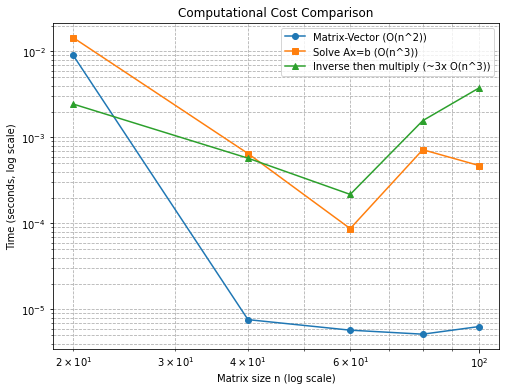

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt

def time_it(func, *args):
    start = time.perf_counter()
    result = func(*args)
    end = time.perf_counter()
    return result, end - start

# Much smaller sizes for demonstration (you can increase locally)
sizes = [20, 40, 60, 80, 100]  
times_matvec, times_solve, times_inverse = [], [], []

for n in sizes:
    A = np.random.rand(n, n)
    b = np.random.rand(n)

    _, t_matvec = time_it(np.dot, A, b)
    _, t_solve = time_it(np.linalg.solve, A, b)

    A_inv, t_invcomp = time_it(np.linalg.inv, A)
    _, t_invapply = time_it(np.dot, A_inv, b)
    t_inverse_total = t_invcomp + t_invapply

    times_matvec.append(t_matvec)
    times_solve.append(t_solve)
    times_inverse.append(t_inverse_total)

plt.figure(figsize=(8,6))
plt.loglog(sizes, times_matvec, 'o-', label='Matrix-Vector (O(n^2))')
plt.loglog(sizes, times_solve, 's-', label='Solve Ax=b (O(n^3))')
plt.loglog(sizes, times_inverse, '^-', label='Inverse then multiply (~3x O(n^3))')
plt.xlabel('Matrix size n (log scale)')
plt.ylabel('Time (seconds, log scale)')
plt.title('Computational Cost Comparison')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


**Conclusion**

- A system of equations can have infinite, zero, or a unique solution.
- Real-life problems demand efficient numerical methods due to computational costs.
- Understanding algorithmic efficiency is key to high-performance computing.